In [1]:
# 先不取平均 看一看能否说明问题
import numpy as np
import sys
import os
sys.path.append(r'C:\Users\81004\1_jupyter_code\1_Functions')
import matplotlib.pyplot as plt
from cal_ppp_dis import cal_ppp_distance as cal_dis
###
# 设置全局字体为Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

In [2]:
# 读取xyz数据
root = r'D:\MD_file\Corning\march\laso4\grwoth'
file_path = os.path.join(root,'cry_1000p.lmp')

start_frame = 0
end_frame = 950
step_frame = 1
###########

# 要分析的元素
ana_element = ['Si','O','Al']
# lmp对应的值
dic_charge = {2.4:'Si', -1.2:'O', 1.8:'Al', 0.6:'Li'}
# 画出分布的元素
draw_element = ['O']
set_cutoff = 4.0

In [3]:
# 先按照要求读取所有的lmp数据
# 每一个原子的信息
class Atom:
    def __init__(self, id0, type0, q, x, y, z, vx, vy, vz, fx, fy, fz, c_ke_atom, c_pe_atom, v_e_total):
        self.id = int(id0)
        self.type = str(type0)
        self.x = x
        self.y = y
        self.z = z
        self.q = q
        self.vx = vx
        self.vy = vy
        self.vz = vz
        self.fx = fx
        self.fy = fy
        self.fz = fz
        self.c_ke_atom = c_ke_atom
        self.c_pe_atom = c_pe_atom
        self.v_e_total = v_e_total
    def print_info(self):
        print(f'id:{int(self.id)}, type:{self.type}, x:{self.x}, y:{self.y}, z:{self.z}, q:{self.q}')
        print(f'vx:{self.vx}, vy:{self.vy}, vz:{self.vz}, fx:{self.fx}, fy:{self.fy}, fz:{self.fz}')
        print(f'E_total:{self.v_e_total}, E_kinetic:{self.c_ke_atom}, E_potential:{self.c_pe_atom}')

In [4]:
class Atom_sys(Atom):
    def __init__(self, atom_instance, q4=None, q6=None, dis=None):
        # 继承 Atom 实例的所有属性
        super().__init__(atom_instance.id, atom_instance.type, atom_instance.q,
                         atom_instance.x, atom_instance.y, atom_instance.z,
                         atom_instance.vx, atom_instance.vy, atom_instance.vz,
                         atom_instance.fx, atom_instance.fy, atom_instance.fz,
                         atom_instance.c_ke_atom, atom_instance.c_pe_atom, atom_instance.v_e_total)
        # 添加新的属性
        self.q4 = q4 
        self.q6 = q6 
        self.dis = dis 

    def print_info(self):
        super().print_info()
        print(f'q4: {self.q4}, q6: {self.q6}, dis: {self.dis}')

In [9]:
# 读取文件
file_type = file_path.split('\\')[-1].split('.')[-1]
frames = []
if file_type=='lmp':
    print('输入文件为lmp格式！')
    frames = read_lmp(file_path)   
elif file_type=='xyz':
    frames = read_xyz_frames(file_path)
    # 找出最大的x、y和z值
    max_x = max([max(frame["atoms"], key=lambda atom: atom["x"])["x"] for frame in frames])
    max_y = max([max(frame["atoms"], key=lambda atom: atom["y"])["y"] for frame in frames])
    max_z = max([max(frame["atoms"], key=lambda atom: atom["z"])["z"] for frame in frames])
    print("Maximum X value:", max_x)
    print("Maximum Y value:", max_y)
    print("Maximum Z value:", max_z)
else:
    print('输入文件有误！')

输入文件为lmp格式！


NameError: name 'read_lmp' is not defined

In [13]:
All_Atom = []
for i_frame in frames:
    temp_atom = i_frame['atom_data']
    All_Atom.append(temp_atom)

In [44]:
# 画图函数

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
    
def draw_q4(data_temp=None,critical_q4=0.18,label_list=None,title_name='No name'):
    # 从 data_list 中提取 x、y、q4 和 q6 数据
    #########
    x_data = [item.x for item in data_temp]
    y_data = [item.y for item in data_temp]
    q4_data = [item.q4 for item in data_temp]
    q6_data = [item.q6 for item in data_temp]
    # 创建二维分布图
    plt.figure(figsize=(10, 6) ,dpi=80)
    mean_q4 = sum(q4_data)/len(q4_data)
    num_max_q4 = len([i for i in q4_data if i>critical_q4])
    print('Mean q4:' + str(round(mean_q4,4))+' Percentage of Q4 > 0.18:'+ str(round(num_max_q4/len(q4_data)*100,2))+'%')
    
    ###########################################
    # 定义viridis色谱的底端绿色渐变
    
    viridis_cmap = plt.get_cmap('viridis')
    
    # 生成顶端橙黄色的渐变，使用非常短的橙色段
    orange_yellow = ['#ffea00', '#ff7f0e']  # 橙色到黄色的 HEX 色码，顺序调整为黄色到橙色
    orange_yellow_cmap = LinearSegmentedColormap.from_list('orange_yellow', orange_yellow, N=8)
    
    # 合并两个色谱，创建自定义色谱
    colors = np.vstack((viridis_cmap(np.linspace(0, 1, 128)),
                        orange_yellow_cmap(np.linspace(0, 1, 8))))  # 使用非常短的橙色段
    custom_cmap = ListedColormap(colors)
    ###########################################################
    name_x = file_path.split('\\')[-1]
    # 绘制 q4 在 x-y 平面上的二维分布图
    title_name = title_name
    plt.title(title_name , fontsize=15, fontweight='bold') 
    
    ################
    plt.scatter(x_data, y_data, s=15, c=q4_data, cmap=custom_cmap, marker='o',vmin=0.05, vmax=critical_q4)
    plt.colorbar()
    if label_list is not None:
        plt.scatter(label_list[0],label_list[1],color='blue')
    # plt.title('O' , fontsize=15, fontweight='bold')  
    plt.xlabel('X-axis ', fontsize=15, fontweight='bold')  # 设置 x 轴标签字体大小和加粗
    plt.ylabel('Y-axis', fontsize=15, fontweight='bold')  # 设置 y 轴标签字体大小和加粗
    
    # 设置 x 轴刻度值的字体大小、颜色和加粗
    plt.xticks(range(0, int(max(x_data)) + 1, 10), fontsize=12, fontweight='bold')
    # 设置 y 轴刻度值的字体大小、颜色和加粗
    plt.yticks(fontsize=12, fontweight='bold')
    # plt.legend()
    plt.show()

# 读取保存的文件

In [83]:
# 加载数据
filepath_analist = os.path.join(root,'ana_frame.npy')
Frame_allatom_list = np.load(filepath_analist, allow_pickle=True)
print(len(frame_allatom_list))
filepath_q4q6dis = os.path.join(root,'ana_q4q6dis.npy')
Frame_q4q6dis_list = np.load(filepath_q4q6dis, allow_pickle=True)
print(len(frame_q4q6dis_list))
# 读取boxsize
filepath_boxsize = os.path.join(root,'boxsize.npy')
Frame_boxsize = np.load(filepath_boxsize)

6006
5148


# 计算键角分布


In [25]:
import numpy as np


def minimum_image(vec, box_size):
    """应用最小镜像准则 (MIC) 修正周期性边界条件 (PBC)。"""
    return vec - np.round(vec / box_size) * box_size

def cal_bad(point_center, point_1, point_2, box_size):
    """
    计算原子键角 (point_1 - point_center - point_2)，考虑周期性边界条件 (PBC)。

    :param point_center: ndarray, 形如 (x, y, z) 的中心点坐标
    :param point_1: ndarray, 形如 (x, y, z) 的第一个原子坐标
    :param point_2: ndarray, 形如 (x, y, z) 的第二个原子坐标
    :param box_size: ndarray, 盒子大小 (Lx, Ly, Lz)
    :return: float, 角度值 (单位: 度)
    """
    # 计算矢量，考虑 PBC
    vec1 = minimum_image(point_1 - point_center, box_size)
    vec2 = minimum_image(point_2 - point_center, box_size)

    # 计算夹角
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)

    # 避免除零错误
    if norm_vec1 == 0 or norm_vec2 == 0:
        raise ValueError("错误: 计算夹角时发现零长度矢量！")

    cos_theta = np.clip(dot_product / (norm_vec1 * norm_vec2), -1.0, 1.0)
    angle = np.degrees(np.arccos(cos_theta))  # 转换为角度
    
    return angle


In [27]:
# 定义原子坐标 (x, y, z)
point_center = np.array([0.5, 0.5, 0.5])
point_1 = np.array([0.1, 0.5, 0.5])
point_2 = np.array([0.9, 0.5, 0.5])

# 盒子大小 (Lx, Ly, Lz)
box_size = np.array([1.0, 1.0, 1.0])

# 计算键角
angle = cal_bad(point_center, point_1, point_2, box_size)
print(f"计算得到的键角: {angle:.2f}°")


计算得到的键角: 180.00°


In [100]:
import numpy as np
from itertools import combinations

def cal_dis(point_1,point_2, box_size):
    xyz_1 = np.array([point_1.x,point_1.y,point_1.z])
    xyz_2 = np.array([point_2.x,point_2.y,point_2.z])
    delta = xyz_1-xyz_2
    delta = delta - np.round(delta / box_size) * box_size
    dis = np.sqrt(np.sum(np.square(delta)))
    return dis
    
def minimum_image(vec, box_size):
    """应用最小镜像准则 (MIC) 修正周期性边界条件 (PBC)。"""
    return vec - np.round(vec / box_size) * box_size

def compute_bond_angle(point_center, point_1, point_2, box_size):
    """计算 O-center-O 的键角，考虑 PBC。"""
    vec1 = minimum_image(np.array([point_1.x, point_1.y, point_1.z]) - 
                         np.array([point_center.x, point_center.y, point_center.z]), box_size)
    
    vec2 = minimum_image(np.array([point_2.x, point_2.y, point_2.z]) - 
                         np.array([point_center.x, point_center.y, point_center.z]), box_size)

    # 计算夹角
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)

    if norm_vec1 == 0 or norm_vec2 == 0:
        return None  # 避免除零错误

    cos_theta = np.clip(dot_product / (norm_vec1 * norm_vec2), -1.0, 1.0)
    angle = np.degrees(np.arccos(cos_theta))  # 转换为角度
    
    return angle

def find_neighbors(center_atom, endpoint_atoms, cutoff, box_size):
    """寻找距离 `center_atom` 小于 `cutoff` 的 `O` 原子。"""
    neighbors = []
    center_pos = np.array([center_atom.x, center_atom.y, center_atom.z])

    for atom in endpoint_atoms:
        endpoint_pos = np.array([atom.x, atom.y, atom.z])
        vec = minimum_image(endpoint_pos - center_pos, box_size)
        distance = np.linalg.norm(vec)

        if distance <= cutoff and distance > 1.0:
            neighbors.append(atom)
    
    return neighbors

def calculate_angles(list_center, list_endpoints, box_size, cutoff, center_types, endpoint_type):
    """
    计算所有 O-center-O 的键角，考虑周期性边界条件和截断距离。
    
    :param list_center: list, 中心原子列表 (Si, Al 等)
    :param list_endpoints: list, 端点原子列表 (O 等)
    :param box_size: ndarray, 盒子大小 [Lx, Ly, Lz]
    :param cutoff: float, 截断半径
    :param center_types: list, 需要作为中心的原子类型列表
    :param endpoint_type: str, 需要作为端点的原子类型
    :return: dict, {中心原子索引: [角度列表]}
    """
    angles_dict = {}

    for i, center_atom in enumerate(list_center):
        if center_atom.type not in center_types:
            continue
        # 筛选符合要求的原子
        list_neibor = [i for i in list_endpoints if i.type in endpoint_type]
        
        # 找到所有配位的 O 原子
        neighbors = find_neighbors(center_atom, list_neibor, cutoff, box_size)

        # 至少需要两个 O 原子才能计算 O-center-O 角度
        if len(neighbors) < 2:
            continue

        # 计算所有可能的 O-center-O 角度
        angles = []
        for o1, o2 in combinations(neighbors, 2):
            angle = compute_bond_angle(center_atom, o1, o2, box_size)
            if angle is not None:
                angles.append(angle)
        if angles:
            angles_dict[i] = angles  # 记录当前中心原子的键角信息
    return angles_dict


# 计算角度的分布 all型

In [180]:
# 定义
# 先筛选出dis在0-5范围内的 所有形成体 原子
cutoff = 3.8
range_dis = [cutoff,10-cutoff]
# 中心原子类型和端点原子类型
center_types = [ 'Si','Al',]  
endpoint_types = ["Al",'Si' ] 

In [182]:
frame_q4q6dis_list[0].print_info()

id:1, type:O, x:8.35064, y:20.7209, z:10.2006, q:-1.2
vx:9.59168, vy:6.4961, vz:-6.76946, fx:-1.45072, fy:-0.124733, fz:-0.442504
E_total:-10.1631, E_kinetic:0.149261, E_potential:-10.3123
q4: 0.1485150220995631, q6: 0.1485150220995631, dis: 23.96452141864093


In [184]:
# 中心原子 
center_atom_list = [i for i in frame_q4q6dis_list if range_dis[0]<i.dis<range_dis[1] and i.type in center_types]
# 四周原子 

index_label = np.zeros_like(frame_allatom_list)
# 首先先把 center原子给标记了
neibor_atom_list = center_atom_list.copy()
for i_num,i_atom in enumerate(center_atom_list):
    i_index = i_atom.id -1
    index_label[i_index] = 1
#
box_size = Frame_boxsize
# 找四周的原子 
for i_num,i_atom in enumerate(center_atom_list):
    for j_num,j_atom in enumerate(frame_allatom_list):
    # 如果不是中心原子类型 或者 已经在当中了 就不要
        if j_atom.type not in endpoint_types or index_label[j_atom.id-1]==1:
            continue
        dis = cal_dis(i_atom,j_atom,box_size)
        if dis<cutoff:
            j_index = j_atom.id-1
            index_label[j_index]=1
            neibor_atom_list.append(j_atom)
print(f'中心原子数量：{len(center_atom_list)}')
print(f'四周原子数量：{len(neibor_atom_list)}')

中心原子数量：72
四周原子数量：210


In [186]:
# 分析的list
list_center = center_atom_list
list_endpoints = neibor_atom_list
box_size = Frame_boxsize
# 计算键角
res_angles = calculate_angles(list_center, list_endpoints, box_size, cutoff, center_types, endpoint_type)

# # 输出键角信息
# for center_idx, angle_list in angles.items():
#     print(f"中心原子 {center_idx}: 键角列表 {angle_list}")


In [187]:
res_angle_list = list(res_angles.values())
res_angle_list = [j for i in res_angle_list for j in i]


dis range:[3.8, 6.2]


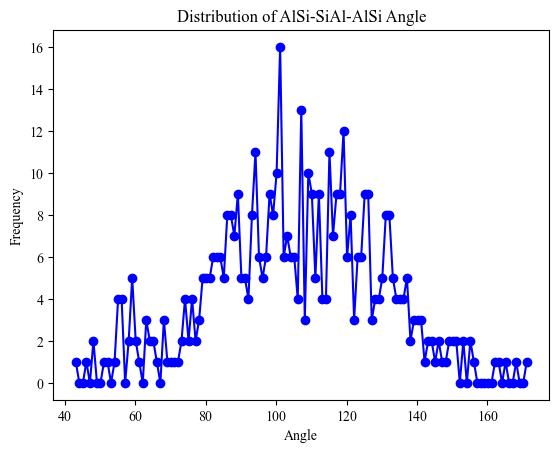

In [188]:
# 数据
data =res_angle_list

# 计算直方图
bin_width = 1.0
bins = np.arange(min(data), max(data) + bin_width, bin_width)  # 生成 bin 边界
hist_values, bin_edges = np.histogram(data, bins=bins)  # 计算直方图

# 计算 bin 中心
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# 绘制折线图
plt.plot(bin_centers, hist_values, marker='o', linestyle='-', color='b')

# 设置标签
plt.xlabel('Angle')
plt.ylabel('Frequency')
center_name = ''.join(str(x) for x in center_types) 
endpoints_name = ''.join(str(x) for x in endpoint_type) 
print(f'dis range:{range_dis}')
plt.title(f'Distribution of {endpoints_name}-{center_name}-{endpoints_name} Angle')
# 显示图像
plt.show()


# 计算指定类型的角度

In [239]:
def apply_pbc(vec, box_size):
    """ 处理周期性边界条件（PBC） """
    return vec - box_size * np.round(vec / box_size)

def calculate_angle(vec1, vec2):
    """ 计算两个向量之间的夹角（单位：度） """
    dot_product = np.dot(vec1, vec2)
    norm_product = np.linalg.norm(vec1) * np.linalg.norm(vec2)
    
    if norm_product == 0:
        return None  # 避免除零错误

    cos_theta = np.clip(dot_product / norm_product, -1.0, 1.0)
    return np.degrees(np.arccos(cos_theta))

def compute_Si_O_Al_angles(center_atoms, si_atoms, al_atoms, box_size, cutoff=3.0):
    angles = []
    
    for center in center_atoms:  # 遍历所有 O 原子
        si_neighbors = []
        al_neighbors = []
        
        # 找到 O 附近的 Si 原子
        for si in si_atoms:
            vec_si_o = np.array([si.x - center.x, si.y - center.y, si.z - center.z])
            vec_si_o = apply_pbc(vec_si_o, box_size)
            dist_si_o = np.linalg.norm(vec_si_o)

            if dist_si_o < cutoff:
                si_neighbors.append((si, vec_si_o))

        # 找到 O 附近的 Al 原子
        for al in al_atoms:
            vec_al_o = np.array([al.x - center.x, al.y - center.y, al.z - center.z])
            vec_al_o = apply_pbc(vec_al_o, box_size)
            dist_al_o = np.linalg.norm(vec_al_o)

            if dist_al_o < cutoff:
                al_neighbors.append((al, vec_al_o))

        # 计算所有 Si-O-Al 角度
        for si_atom, vec_si in si_neighbors:
            for al_atom, vec_al in al_neighbors:
                angle = calculate_angle(vec_si, vec_al)
                if angle is not None:
                    angles.append(angle)

    return angles

In [284]:
# 再次筛选原子
# 定义
# 先筛选出dis在0-5范围内的 所有形成体 原子
cutoff = 2.5
range_dis = [cutoff+10,20]
center_types = ['O','Si','Al']
endpoint_types = ['Si','Al','O']

In [286]:
# 中心原子 
center_atom_list = [i for i in frame_q4q6dis_list if range_dis[0]<i.dis<range_dis[1] and i.type in center_types]
# 四周原子 

index_label = np.zeros_like(frame_allatom_list)
# 首先先把 center原子给标记了
neibor_atom_list = center_atom_list.copy()
for i_num,i_atom in enumerate(center_atom_list):
    i_index = i_atom.id -1
    index_label[i_index] = 1
#
box_size = Frame_boxsize
# 找四周的原子 
for i_num,i_atom in enumerate(center_atom_list):
    for j_num,j_atom in enumerate(frame_allatom_list):
    # 如果不是中心原子类型 或者 已经在当中了 就不要
        if j_atom.type not in endpoint_types or index_label[j_atom.id-1]==1:
            continue
        dis = cal_dis(i_atom,j_atom,box_size)
        if dis<cutoff:
            j_index = j_atom.id-1
            index_label[j_index]=1
            neibor_atom_list.append(j_atom)
print(f'中心原子数量：{len(center_atom_list)}')
print(f'四周原子数量：{len(neibor_atom_list)}')

中心原子数量：644
四周原子数量：5148


In [298]:
# 分析的list Si-O-Al
bad_type = ['Al','O','Al']
list_center = [i for i in center_atom_list if i.type == bad_type[1]]
list_end_1 = [i for i in neibor_atom_list if i.type == bad_type[0] ]
list_end_2 = [i for i in neibor_atom_list if i.type == bad_type[2] ]
# 盒子尺寸 和 截断半径
box_size = Frame_boxsize
cutoff = 2.5  
# 计算 Si-O-Al 角度
angles = compute_Si_O_Al_angles(list_center, list_end_1, list_end_2, Frame_boxsize, cutoff)

[12.5, 20]


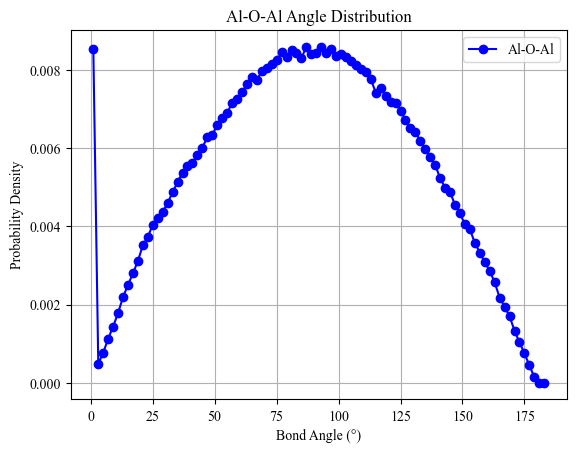

In [299]:
# 自定义 bins，例如 0° 到 180° 之间，每 5° 一个 bin
bins = np.arange(0, 185, 2)  # 0, 5, 10, ..., 180

# 计算 Si-O-Al 角度
title = f'{bad_type[0]}-{bad_type[1]}-{bad_type[2]}'
angles = angles
# 计算角度分布
bin_counts, bin_edges = np.histogram(angles, bins=bins, density=True)

# 计算 bin 中心位置
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
print(range_dis)
# 画折线图
plt.plot(bin_centers, bin_counts, marker='o', linestyle='-', color='b', label=title)
# 添加标签
plt.xlabel('Bond Angle (°)')
plt.ylabel('Probability Density')
plt.title(f'{title} Angle Distribution')
plt.legend()
plt.grid(True)
# 显示图像
plt.show()

# 常规的键角差距不大，但是std应该会存在着差异

[12.5, 20]


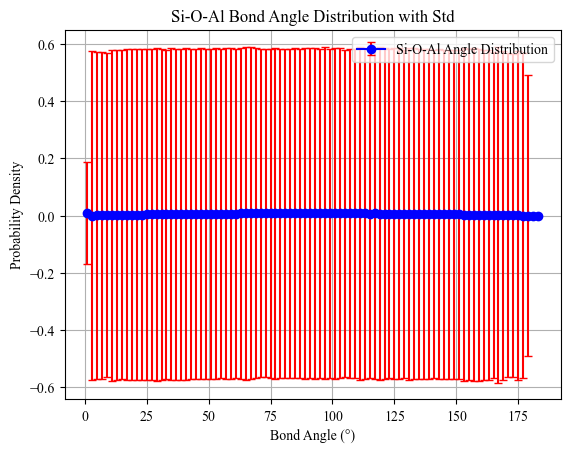

In [308]:
# 自定义 bins，例如 0° 到 180° 之间，每 5° 一个 bin
bins = np.arange(0, 185, 5)  # 0, 5, 10, ..., 180

# 计算 Si-O-Al 角度
title = f'{bad_type[0]}-{bad_type[1]}-{bad_type[2]}'
angles = angles

# 计算每个 bin 的分布（直方图）
bin_counts, bin_edges = np.histogram(angles, bins=bins, density=True)

# 计算 bin 中心位置
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# 计算每个 bin 内的标准差（std）
bin_indices = np.digitize(angles, bins)  # 找到角度属于哪个 bin
bin_stds = []

for i in range(1, len(bins)):  # 遍历每个 bin
    bin_values = [angles[j] for j in range(len(angles)) if bin_indices[j] == i]
    if len(bin_values) > 1:
        bin_stds.append(np.std(bin_values))  # 计算标准差
    else:
        bin_stds.append(0)  # 避免单值情况的错误

# 画折线图 + 误差棒
plt.errorbar(bin_centers, bin_counts, yerr=bin_stds, fmt='-o', color='b', 
             ecolor='r', capsize=3, label='Si-O-Al Angle Distribution')

# 添加标签
plt.xlabel('Bond Angle (°)')
plt.ylabel('Probability Density')
plt.title('Si-O-Al Bond Angle Distribution with Std')
plt.legend()
plt.grid(True)
print(range_dis)
# 显示图像
plt.show()


# 看一下PDF的分布

In [322]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_pdf(atom_list, start_ele_type, end_ele_type, box_size, bin_width=0.1, r_max=10):
    distances = []
    
    # 遍历所有原子对
    for i in range(len(atom_list)):
        for j in range(i + 1, len(atom_list)):
            atom1, atom2 = atom_list[i], atom_list[j]
            
            # 仅计算指定的原子对
            if (atom1.type in start_ele_type and atom2.type in end_ele_type) or \
               (atom1.type in end_ele_type and atom2.type in start_ele_type):
                
                # 计算 PBC 处理后的最小距离
                r = periodic_distance(atom1, atom2, box_size)
                
                # 仅考虑合理范围的距离
                if r < r_max:
                    distances.append(r)
    
    # 计算直方图
    bins = np.arange(0, r_max, bin_width)
    hist, _ = np.histogram(distances, bins=bins)

    # 计算 bin 中心
    bin_centers = (bins[:-1] + bins[1:]) / 2

    # 归一化
    shell_volumes = 4 * np.pi * bin_centers**2 * bin_width  # 球壳体积
    number_density = len(atom_list) / (box_size**3)  # 平均原子密度

    gr = hist / (shell_volumes * number_density * len(atom_list))  # 归一化，变成概率密度

    return bin_centers, gr

def periodic_distance(atom1, atom2, box_size):
    """计算 PBC 处理后的最小距离"""
    delta = np.array([atom1.x - atom2.x, atom1.y - atom2.y, atom1.z - atom2.z])
    delta -= np.round(delta / box_size) * box_size  # PBC 处理
    return np.linalg.norm(delta)



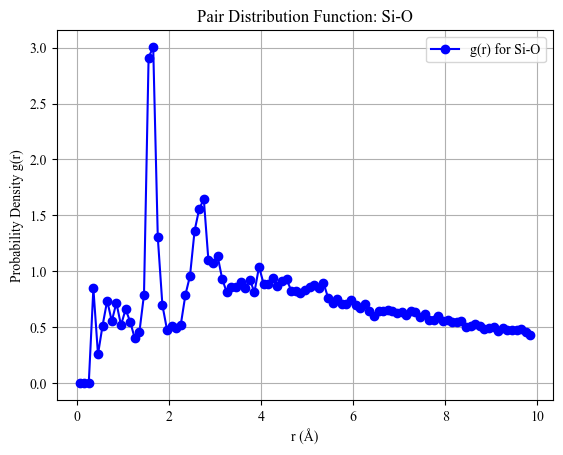

In [324]:
# 设定计算参数
box_size = 30  # 立方体模拟盒大小
bin_width = 0.1
r_max = 10

# 计算 Si-O 对的 PDF
pdf_ele = ['Si', 'O']
bin_centers, g_r = calculate_pdf(atom_list, pdf_ele, pdf_ele, box_size, bin_width, r_max)

# 绘制 PDF 曲线
plt.plot(bin_centers, g_r, marker='o', linestyle='-', color='b', label=f'g(r) for {pdf_ele[0]}-{pdf_ele[1]}')

# 添加标签
plt.xlabel('r (Å)')
plt.ylabel('Probability Density g(r)')
plt.title(f'Pair Distribution Function: {pdf_ele[0]}-{pdf_ele[1]}')
plt.legend()
plt.grid(True)

# 显示图像
plt.show()


In [316]:
import numpy as np
import matplotlib.pyplot as plt

def compute_rdf(list_center, list_endpoints, box_size, cutoff, bins):
    """计算径向分布函数 (g(r))"""
    distances = []
    
    for center in list_center:
        for endpoint in list_endpoints:
            r = distance(center, endpoint, box_size)
            if r < cutoff:
                distances.append(r)
    
    distances = np.array(distances)
    
    # 计算分布直方图
    bin_counts, bin_edges = np.histogram(distances, bins=bins, density=False)
    
    # 计算壳体体积
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    shell_volumes = (4/3) * np.pi * (bin_edges[1:]**3 - bin_edges[:-1]**3)
    
    # 计算径向分布 g(r)
    number_density = len(list_endpoints) / (box_size**3)
    gr = bin_counts / (shell_volumes * number_density)
    
    return bin_centers, gr

def distance(atom1, atom2, box_size):
    """计算周期性边界条件 (PBC) 下的最小距离"""
    delta = np.array([atom1.x - atom2.x, atom1.y - atom2.y, atom1.z - atom2.z])
    delta -= np.round(delta / box_size) * box_size  # PBC 处理
    return np.linalg.norm(delta)

# 设定计算参数
cutoff = 10.0  # 截断半径
bins = np.linspace(0, cutoff, 50)  # 均匀划分 50 个 bin

# 选择 Si-O 对
pdf_ele = ['Si', 'O']
list_center = [i for i in center_atom_list if i.type == pdf_ele[0]]
list_endpoints = [i for i in neibor_atom_list if i.type == pdf_ele[1]]

# 计算径向分布 g(r)
r, g_r = compute_rdf(list_center, list_endpoints, Frame_boxsize, cutoff, bins)

# 绘制 PDF 曲线
plt.plot(r, g_r, marker='o', linestyle='-', color='b', label=f'g(r) for {pdf_ele[0]}-{pdf_ele[1]}')

# 添加标签
plt.xlabel('r (Å)')
plt.ylabel('g(r)')
plt.title(f'Radial Distribution Function: {pdf_ele[0]}-{pdf_ele[1]}')
plt.legend()
plt.grid(True)

# 显示图像
plt.show()


ValueError: operands could not be broadcast together with shapes (49,) (3,) 